----
# Exercice 2
----
# Chargement des packages 

In [1]:
#Annexe(1)

Tout d'abord nous avons rencontré des problèmes de saisie du tableau. 
En effet, celui-ci a été encodé sous un autre format que le format utf8 standart, nous allons ainsi procéder grâce à la fonction `detect` dans le package `chardet`, retrouver le type utilisé afin de permettre à `read_csv` d'importer notre tableau de données.

In [2]:
#Annexe(2)

Windows-1252


# Chargement des données 

On dispose ici de trois jeu de données : un jeu de donnée `data_com_train`, un  `data_com_test` et un `purchases`. 
Le jeu de donnée `data_com_train` est  le jeu de donnée d'entraînement, qui dispose des champs suivant : 
- `category id` : identiﬁant de la catégorie du produit (entier entre 0 et 19)
- `category` : nom de la catégorie du produit
- `title` : titre du produit 
- `description` : description du produit

Le jeu de donnée `data_com_test` est le jeu sur lequelle nous allons tester notre apprentissage, il dipose des champs suivant :
- `title` : titre du produit 
- `description` : description du produit

Le jeu de donnée `purchases` contient la liste des achats réalisés le 1er septembre 2017. Les
champs sont les suivants : 
- time : date et heure d'achat du produit 
- amount : prix en euros du produit acheté

In [3]:
#Annexe(3)
#Data_com_train

,category_id,category,title,description
0,0,TELEPHONIE - GPS | ACCESSOIRE TELEPHONE | COQU...,Coque Samsung ACE S5830 Cassette audio transpa…,Coque Samsung ACE S5830 Cassette audio transp...
1,0,TELEPHONIE - GPS | ACCESSOIRE TELEPHONE | COQU...,Coque rigide Violette pour NOKIA LUMIA 625 moti…,Coque rigide Violette pour NOKIA LUMIA 625 mot...
2,0,TELEPHONIE - GPS | ACCESSOIRE TELEPHONE | COQU...,Coque rigide Rose bonbon pour HUAWEI ASCEND P2 …,Coque rigide Rose bonbon pour HUAWEI ASCEND P2...
3,0,TELEPHONIE - GPS | ACCESSOIRE TELEPHONE | COQU...,Coque souple Grise pour SONY XPERIA Z1 motif Dr…,Coque souple Grise pour SONY XPERIA Z1 motif D...
4,0,TELEPHONIE - GPS | ACCESSOIRE TELEPHONE | COQU...,"Coque HTC One S 4,3'' – Dessin Tête de Girafe ...","Coque HTC One S 4,3'' – Dessin Tête de Girafe ..."


In [4]:
#Annexe(4)
#Data_com_test

,id,title,description
0,0,HTC One X / X+ coque dure case noir - Naives K...,HTC One X / X+ coque dure case noir - Naives K...
1,1,Xoxo XO1084 femmes Montre,Xoxo XO1084 femmes Montre - Acheter Authentiqu...
2,2,"L'Europe et la Révolution française. I, Les mo...",Albert Sorel
3,3,Kit Gros Freins K-Sport 8 Pistons RENAULT NEW …,Kit Gros Freins K-Sport 8 Pistons RENAULT NEW ...
4,4,Chargeur + Chargeur allume cigare + Cable USB +…,Chargeur + Chargeur allume cigare + Cable USB ...


In [5]:
#Annexe(5)
#Purchases

,time,amount
0,2017-09-01 00:00:05,9.950000
1,2017-09-01 00:00:05,10.890000
2,2017-09-01 00:00:09,26.990000
3,2017-09-01 00:00:16,285.679993
4,2017-09-01 00:00:18,14.990000


## Question 1
Notre objectif dans cette partie est d'écrire un algorithme de classiﬁcation supervisée qui prévoit la catégorie d’un produit à partir de son titre et de sa description. 

#### Création des vecteurs One Hot : 

In [6]:
#Annexe(6)

#### Adaptation à un modèle : 

In [7]:
#Annexe(7)

#### Nous allons utiliser une forêt aléatoire comme modèle de prédiction : 

In [8]:
#Annexe(8)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
#Annexe(9)

0.9715

Le modèle est donc fiable à 97%.

#### On essaye maintenant sur notre datatest :

In [10]:
#Annexe(10)

array([15, 15, 15, ..., 15, 15, 15], dtype=int64)

On voit donc que pour notre première ligne dans notre jeu de données `data_com_test`, la catégorie prédite est la 15.  
De la même façon, on arrive à prédire nos autres lignes de notre jeu de données.

# Question 2 
Notre objectif dans cette partie est d'écrirer un programme pour estimer la fonction de densitée de probabilitée
conjointe, par la méthode d'estimation par noyau et nous illustrerons la fonction sous forme de
carte de chaleur.

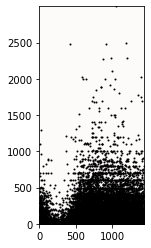

In [11]:
#Annexe(11)

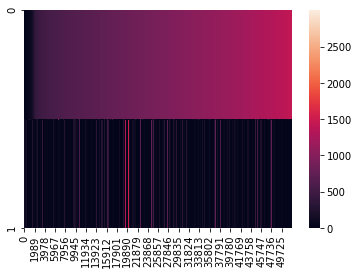

In [12]:
#Annexe(12)

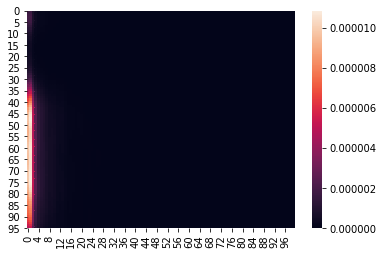

In [13]:
#Annexe(13)

----
# Annexe 

In [ ]:
#Annexe(1)
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import datetime

In [ ]:
#Annexe(2)
import chardet
with open("train.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(15000))

# check what the character encoding might be
print(result['encoding'])

In [ ]:
#Annexe(3)
data_com_train = pd.read_csv("train.csv", sep = ",",encoding = result["encoding"])
data_com_train.head()

In [ ]:
#Annexe(4)
data_com_test = pd.read_csv("test.csv",encoding = result["encoding"])
data_com_test.head()

In [ ]:
#Annexe(5)
purchases = pd.read_csv('purchases.csv', header = 0, sep = ',')
purchases.head()

In [ ]:
#Annexe(6)
def One_hot_func(data_commerce):
#pour la description
    count_vect = CountVectorizer(max_features=2000) # on prend les 2000 mots les plus importants
    e_comm_counts = count_vect.fit(data_commerce.description)
    e_comm_counts_trans = e_comm_counts.transform(data_commerce.description)

#pour le title
    count_vect3 = CountVectorizer(max_features=2000)
    e_comm_counts3 = count_vect3.fit(data_commerce.title)
    e_comm_counts3_trans = e_comm_counts3.transform(data_commerce.title)

    data_onehot_ecom1 = pd.DataFrame(e_comm_counts_trans.toarray())
    data_onehot_ecom3 = pd.DataFrame(e_comm_counts3_trans.toarray())
    
#regroupement de tous nos one hot en un seul dataframe
    data_onehot = pd.concat([data_onehot_ecom1, data_onehot_ecom3], axis=1)
    return data_onehot

data_onehot_com = One_hot_func(data_com_train)

In [ ]:
#Annexe(7)
X_train, X_test, Y_train, Y_test = train_test_split(data_onehot_com, data_com_train.category_id, test_size = 0.2)

In [ ]:
#Annexe(8)
modelF = RandomForestClassifier()
modelF.fit(X_train, Y_train)

In [ ]:
#Annexe(9)
modelF.score(X_test, Y_test)

In [ ]:
#Annexe(10)
test_onehot = One_hot_func(data_com_test)
modelF.predict(test_onehot)

In [ ]:
#Annexe(11)
def nombre_min(vect):
    date1=datetime.datetime.strptime(vect[0],'%Y-%m-%d %H:%M:%S')
    vect1=[0]
    for i in range(1,len(vect)):
        date=datetime.datetime.strptime(vect[i],'%Y-%m-%d %H:%M:%S')
        nbr=(date-date1).total_seconds()
        vect1.append(nbr/60)
    return(vect1)

m1=nombre_min(purchases.iloc[:,0])
m2=purchases.iloc[:,1]

xmin = min(m1)
xmax = max(m1)
ymin = min(m2)
ymax = max(m2)

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig,ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [ ]:
#Annexe(12)
sb.heatmap(values)

In [ ]:
#Annexe(13)
sb.heatmap(Z)